
#Parcial #2- Fase B
**-Por:**  Sofia Galindo, Diego Herrera, Anamaria Leguizamon

**-Materia**: Procesamiento de datos a Gran Escala

-Pontificia Universidad Javeriana

In [ ]:
# Importando las bibliotecas necesarias
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [ ]:
# Cargar los datos
rionegro_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Clean_Nacidos_Hospital_San_Juan_de_Dios_Rionegro.csv")
envigado_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Clean_Nacidos_Vivos_en_Hospital_Manuel_Uribe_Angel.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
rionegro_data.head() #Nacidos Vivos en Hospital Manuel Uribe Angel

,DEPARTAMENTO,MUNICIPIO,AREA NACIMIENTO,SEXO,PESO (Gramos),TALLA (Centímetros),FECHA NACIMIENTO,TIEMPO DE GESTACIÓN,NÚMERO CONSULTAS PRENATALES,TIPO PARTO,MULTIPLICIDAD EMBARAZO,EDAD MADRE,EDAD PADRE
0,ANTIOQUIA,RIONEGRO,CABECERA MUNICIPAL,MASCULINO,3670,52,'01/01/2020,40,6,CESÁREA,SIMPLE,29,28
1,ANTIOQUIA,RIONEGRO,CABECERA MUNICIPAL,MASCULINO,3290,45,'01/01/2020,40,8,ESPONTÁNEO,SIMPLE,26,30
2,ANTIOQUIA,RIONEGRO,CABECERA MUNICIPAL,MASCULINO,3490,50,'01/01/2020,37,5,CESÁREA,SIMPLE,25,32
3,ANTIOQUIA,RIONEGRO,CABECERA MUNICIPAL,FEMENINO,2660,48,'01/01/2020,39,5,ESPONTÁNEO,SIMPLE,16,31
4,ANTIOQUIA,RIONEGRO,CABECERA MUNICIPAL,MASCULINO,3590,47,'01/01/2020,40,7,CESÁREA,SIMPLE,22,47


In [ ]:
envigado_data.head() ##Nacidos Hospital San Juan de Dios Rionegro

,DEPARTAMENTO,MUNICIPIO,AREA NACIMIENTO,SEXO,PESO (Gramos),TALLA (Centímetros),FECHA NACIMIENTO,TIEMPO DE GESTACIÓN,NÚMERO CONSULTAS PRENATALES,TIPO PARTO,...,NIVEL EDUCATIVO DE LA MADRE,NUMERO DE HIJOS NACIDOS VIVOS,NUMERO DE EMBARAZOS,AREA DE RESIDENCIA,PAÍS DE RESIDENCIA,DEPARTAMENTO RESIDENCIA,MUNICIPIO RESIDENCIA,LONGITUD,LATITUD,GEOREFERENCIA RESIDENCIA
0,ANTIOQUIA,ENVIGADO,CABECERA MUNICIPAL,MASCULINO,2085,45,05/06/2022 12:00:00 AM,37,8,ESPONTÁNEO,...,BÁSICA SECUNDARIA,4,5,CABECERA MUNICIPAL,COLOMBIA,ANTIOQUIA,ITAGÜÍ,-75.614359,6.169598,POINT (-75.6143587142 6.16959762893)
1,ANTIOQUIA,ENVIGADO,CABECERA MUNICIPAL,FEMENINO,3000,47,05/06/2022 12:00:00 AM,37,5,ESPONTÁNEO,...,PROFESIONAL,2,2,CABECERA MUNICIPAL,COLOMBIA,ANTIOQUIA,ENVIGADO,-75.583010,6.167005,POINT (-75.5830101409 6.16700455162)
2,ANTIOQUIA,ENVIGADO,CABECERA MUNICIPAL,MASCULINO,2905,50,05/07/2022 12:00:00 AM,39,8,ESPONTÁNEO,...,MEDIA ACADÉMICA O CLÁSICA,1,1,CABECERA MUNICIPAL,COLOMBIA,ANTIOQUIA,LA ESTRELLA,-75.645190,6.158420,POINT (-75.6451903823 6.15841974028)
3,ANTIOQUIA,ENVIGADO,CABECERA MUNICIPAL,FEMENINO,3700,50,05/07/2022 12:00:00 AM,40,6,ESPONTÁNEO,...,TÉCNICA PROFESIONAL,1,1,CABECERA MUNICIPAL,COLOMBIA,ANTIOQUIA,ENVIGADO,-75.583010,6.167005,POINT (-75.5830101409 6.16700455162)
4,ANTIOQUIA,ENVIGADO,CABECERA MUNICIPAL,FEMENINO,3130,49,05/07/2022 12:00:00 AM,39,12,ESPONTÁNEO,...,MEDIA ACADÉMICA O CLÁSICA,2,2,CABECERA MUNICIPAL,COLOMBIA,ANTIOQUIA,ITAGÜÍ,-75.614359,6.169598,POINT (-75.6143587142 6.16959762893)


# **3.B.- Problema**


**Datos faltantes:**



Utilizamos el método isnull() para identificar y contabilizar valores faltantes en todas las columnas de tus conjuntos de datos.



In [ ]:

faltantes_rionegro = rionegro_data.isnull().sum()

faltantes_rionegro

DEPARTAMENTO                   0
MUNICIPIO                      0
AREA NACIMIENTO                0
SEXO                           0
PESO (Gramos)                  0
TALLA (Centímetros)            0
FECHA NACIMIENTO               0
TIEMPO DE GESTACIÓN            0
NÚMERO CONSULTAS PRENATALES    0
TIPO PARTO                     0
MULTIPLICIDAD EMBARAZO         0
EDAD MADRE                     0
EDAD PADRE                     0
dtype: int64

In [ ]:
faltantes_envigado = envigado_data.isnull().sum()

faltantes_envigado

DEPARTAMENTO                     0
MUNICIPIO                        0
AREA NACIMIENTO                  0
SEXO                             0
PESO (Gramos)                    0
TALLA (Centímetros)              0
FECHA NACIMIENTO                 0
TIEMPO DE GESTACIÓN              0
NÚMERO CONSULTAS PRENATALES      0
TIPO PARTO                       0
MULTIPLICIDAD EMBARAZO           0
PERTENENCIA ÉTNICA               0
GRUPO INDIGENA                   0
EDAD MADRE                       0
RÉGIMEN SEGURIDAD                0
NOMBRE ADMINISTRADORA            0
EDAD PADRE                       0
NIVEL EDUCATIVO PADRE            0
DEPARTAMENTO EXPEDICIÓN          0
MUNICIPIO EXPEDICIÓN             0
ESTADO CONYUGAL DE LA MADRE      0
NIVEL EDUCATIVO DE LA MADRE      0
NUMERO DE HIJOS NACIDOS VIVOS    0
NUMERO DE EMBARAZOS              0
AREA DE RESIDENCIA               0
PAÍS DE RESIDENCIA               0
DEPARTAMENTO RESIDENCIA          0
MUNICIPIO RESIDENCIA             0
LONGITUD            

**Datos fuera de rango o con errores:**

Definimos rangos válidos para variables críticas como peso al nacer, semanas de gestación y edad materna.



In [ ]:
print(rionegro_data['EDAD MADRE'].unique())


[29 26 25 16 22 35 21 15 43 31 24 20 27 30 18 23 33 19 38 37 32 42 34 14
 41 28 36 44 17 40 39 45 13]


In [ ]:
def categorizar_edad_madre(edad):
    if 12 <= edad <= 17:
        return 'adolescencia'
    elif 18 <= edad <= 28:
        return 'jovenes'
    elif 29 <= edad <= 59:
        return 'adultez'
    else:
        return None


In [ ]:


rionegro_data['CATEGORIA EDAD'] = rionegro_data['EDAD MADRE'].apply(categorizar_edad_madre)
mapeo_categoria_edad = {
    'adolescencia': 1,
    'jovenes': 2,
    'adultez': 3
}
rionegro_data['CATEGORIA EDAD'] = rionegro_data['CATEGORIA EDAD'].map(mapeo_categoria_edad)
print(rionegro_data)

     DEPARTAMENTO MUNICIPIO     AREA NACIMIENTO       SEXO  PESO (Gramos)  \
0       ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL  MASCULINO           3670   
1       ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL  MASCULINO           3290   
2       ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL  MASCULINO           3490   
3       ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL   FEMENINO           2660   
4       ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL  MASCULINO           3590   
...           ...       ...                 ...        ...            ...   
2323    ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL   FEMENINO           2710   
2324    ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL  MASCULINO           3470   
2325    ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL   FEMENINO           2810   
2326    ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL  MASCULINO           3920   
2327    ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL  MASCULINO           3520   

      TALLA (Centímetros) FECHA NACIMIENTO  TIEMPO DE GESTACIÓN  \
0       

In [ ]:
envigado_data['CATEGORIA EDAD'] = envigado_data['EDAD MADRE'].apply(categorizar_edad_madre)
mapeo_categoria_edad = {
    'adolescencia': 1,
    'jovenes': 2,
    'adultez': 3
}
envigado_data['CATEGORIA EDAD'] = envigado_data['CATEGORIA EDAD'].map(mapeo_categoria_edad)
print(envigado_data)

      DEPARTAMENTO MUNICIPIO     AREA NACIMIENTO       SEXO  PESO (Gramos)  \
0        ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL  MASCULINO           2085   
1        ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL   FEMENINO           3000   
2        ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL  MASCULINO           2905   
3        ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL   FEMENINO           3700   
4        ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL   FEMENINO           3130   
...            ...       ...                 ...        ...            ...   
17294    ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL  MASCULINO           2825   
17295    ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL  MASCULINO           3135   
17296    ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL  MASCULINO           2830   
17297    ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL   FEMENINO           3320   
17298    ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL   FEMENINO           3420   

       TALLA (Centímetros)        FECHA NACIMIENTO  TIEMPO DE G

In [ ]:
def categorizar_peso(peso):
    if  peso <= 2500:
        return 'Bajo Peso'
    elif 2500 < peso <= 4000:
        return 'Peso Adecuado'
    elif 4000 < peso:
        return 'Peso Elevado'
    else:
        return None


In [ ]:
rionegro_data['CATEGORIA PESO'] = rionegro_data['PESO (Gramos)'].apply(categorizar_peso)
mapeo_categoria_peso = {
    'Bajo Peso': 1,
    'Peso Adecuado': 2,
    'Peso Elevado': 3
}
rionegro_data['CATEGORIA PESO'] = rionegro_data['CATEGORIA PESO'].map(mapeo_categoria_peso)
print(rionegro_data)

     DEPARTAMENTO MUNICIPIO     AREA NACIMIENTO       SEXO  PESO (Gramos)  \
0       ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL  MASCULINO           3670   
1       ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL  MASCULINO           3290   
2       ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL  MASCULINO           3490   
3       ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL   FEMENINO           2660   
4       ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL  MASCULINO           3590   
...           ...       ...                 ...        ...            ...   
2323    ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL   FEMENINO           2710   
2324    ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL  MASCULINO           3470   
2325    ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL   FEMENINO           2810   
2326    ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL  MASCULINO           3920   
2327    ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL  MASCULINO           3520   

      TALLA (Centímetros) FECHA NACIMIENTO  TIEMPO DE GESTACIÓN  \
0       

In [ ]:
envigado_data['CATEGORIA PESO'] = envigado_data['PESO (Gramos)'].apply(categorizar_peso)
mapeo_categoria_peso = {
    'Bajo Peso': 1,
    'Peso Adecuado': 2,
    'Peso Elevado': 3
}
envigado_data['CATEGORIA PESO'] = envigado_data['CATEGORIA PESO'].map(mapeo_categoria_peso)
print(envigado_data)

      DEPARTAMENTO MUNICIPIO     AREA NACIMIENTO       SEXO  PESO (Gramos)  \
0        ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL  MASCULINO           2085   
1        ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL   FEMENINO           3000   
2        ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL  MASCULINO           2905   
3        ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL   FEMENINO           3700   
4        ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL   FEMENINO           3130   
...            ...       ...                 ...        ...            ...   
17294    ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL  MASCULINO           2825   
17295    ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL  MASCULINO           3135   
17296    ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL  MASCULINO           2830   
17297    ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL   FEMENINO           3320   
17298    ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL   FEMENINO           3420   

       TALLA (Centímetros)        FECHA NACIMIENTO  TIEMPO DE G

In [ ]:
def categorizar_semanas(semana):
    if  semana <28:
        return 'Prematuro Extremo'
    elif 28 <= semana < 32:
        return 'Muy prematuro'
    elif 32 <= semana < 37:
        return 'Prematuro moderado'
    elif 37 <= semana < 42:
        return 'Semanas completas'
    elif 42 < semana:
        return 'Prolongado'
    else:
        return None


In [ ]:
rionegro_data['CATEGORIA SEMANAS'] = rionegro_data['TIEMPO DE GESTACIÓN'].apply(categorizar_semanas)
mapeo_categoria_semana = {
    'Prematuro Extremo': 1,
    'Muy prematuro': 2,
    'Prematuro moderado': 3,
    'Semanas completas' :4,
    'Prolongado':5
}
rionegro_data['CATEGORIA SEMANAS'] = rionegro_data['CATEGORIA SEMANAS'].map(mapeo_categoria_semana)
print(rionegro_data)

     DEPARTAMENTO MUNICIPIO     AREA NACIMIENTO       SEXO  PESO (Gramos)  \
0       ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL  MASCULINO           3670   
1       ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL  MASCULINO           3290   
2       ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL  MASCULINO           3490   
3       ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL   FEMENINO           2660   
4       ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL  MASCULINO           3590   
...           ...       ...                 ...        ...            ...   
2323    ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL   FEMENINO           2710   
2324    ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL  MASCULINO           3470   
2325    ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL   FEMENINO           2810   
2326    ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL  MASCULINO           3920   
2327    ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL  MASCULINO           3520   

      TALLA (Centímetros) FECHA NACIMIENTO  TIEMPO DE GESTACIÓN  \
0       

In [ ]:
envigado_data['CATEGORIA SEMANAS'] = envigado_data['TIEMPO DE GESTACIÓN'].apply(categorizar_semanas)
mapeo_categoria_semana = {
    'Prematuro Extremo': 1,
    'Muy prematuro': 2,
    'Prematuro moderado': 3,
    'Semanas completas' :4,
    'Prolongado':5
}
envigado_data['CATEGORIA SEMANAS'] = envigado_data['CATEGORIA SEMANAS'].map(mapeo_categoria_semana)
print(envigado_data)

      DEPARTAMENTO MUNICIPIO     AREA NACIMIENTO       SEXO  PESO (Gramos)  \
0        ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL  MASCULINO           2085   
1        ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL   FEMENINO           3000   
2        ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL  MASCULINO           2905   
3        ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL   FEMENINO           3700   
4        ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL   FEMENINO           3130   
...            ...       ...                 ...        ...            ...   
17294    ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL  MASCULINO           2825   
17295    ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL  MASCULINO           3135   
17296    ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL  MASCULINO           2830   
17297    ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL   FEMENINO           3320   
17298    ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL   FEMENINO           3420   

       TALLA (Centímetros)        FECHA NACIMIENTO  TIEMPO DE G

Detecta valores atípicos mediante técnicas estadísticas como el uso de percentiles o análisis de distribuciones.


In [ ]:
# Calcular estadísticas descriptivas
desc_rionegro = rionegro_data.describe()
desc_envigado = envigado_data.describe()

# Imprimir estadísticas descriptivas
print("Estadísticas descriptivas de datos de Rionegro:")
print(desc_rionegro)

print("\nEstadísticas descriptivas de datos de Envigado:")
print(desc_envigado)


Estadísticas descriptivas de datos de Rionegro:
       PESO (Gramos)  TALLA (Centímetros)  TIEMPO DE GESTACIÓN  \
count    2328.000000          2328.000000          2328.000000   
mean     3137.003007            48.481529            38.831615   
std       382.369386             1.912482             1.063920   
min      1790.000000            40.000000            32.000000   
25%      2887.500000            47.000000            38.000000   
50%      3120.000000            49.000000            39.000000   
75%      3380.000000            50.000000            40.000000   
max      4780.000000            59.000000            42.000000   

       NÚMERO CONSULTAS PRENATALES   EDAD MADRE   EDAD PADRE  CATEGORIA EDAD  \
count                  2328.000000  2328.000000  2328.000000     2328.000000   
mean                      6.431701    25.005155    28.653351        2.184278   
std                       2.399071     6.315986     8.531981        0.573721   
min                       0.000000   

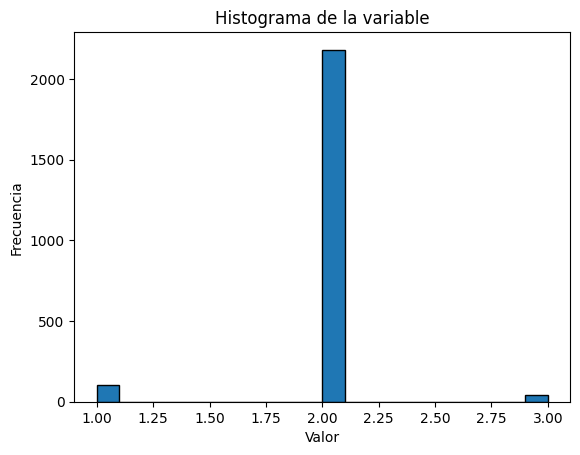

In [ ]:
import matplotlib.pyplot as plt

plt.hist(rionegro_data['CATEGORIA PESO'], bins=20, edgecolor='black')  # Utilizar 20 bins
plt.title('Histograma de la variable')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

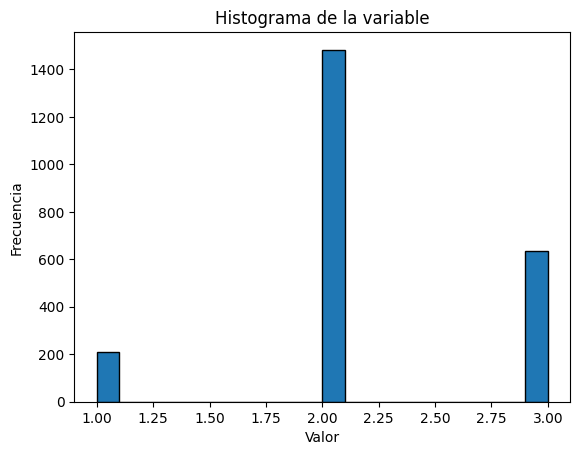

In [ ]:
plt.hist(rionegro_data['CATEGORIA EDAD'], bins=20, edgecolor='black')  # Utilizar 20 bins
plt.title('Histograma de la variable')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

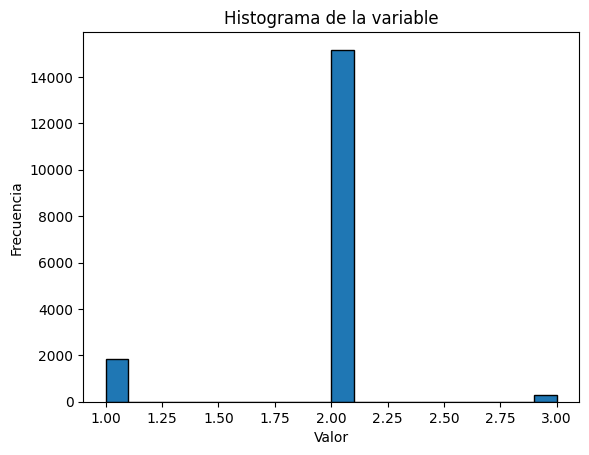

In [ ]:
plt.hist(envigado_data['CATEGORIA PESO'], bins=20, edgecolor='black')  # Utilizar 20 bins
plt.title('Histograma de la variable')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

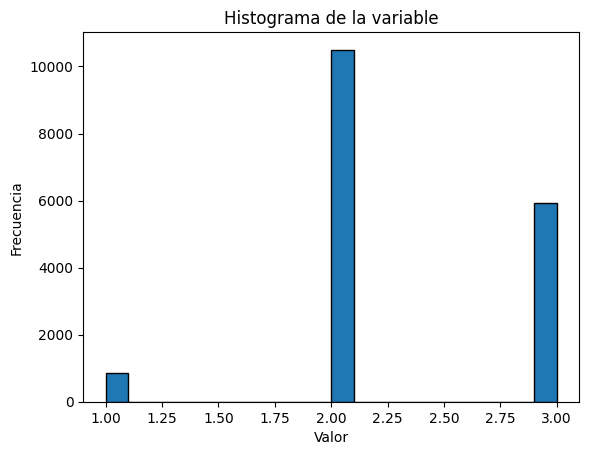

In [ ]:
plt.hist(envigado_data['CATEGORIA EDAD'], bins=20, edgecolor='black')  # Utilizar 20 bins
plt.title('Histograma de la variable')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:


variables_rionegro = set(rionegro_data.columns)
variables_envigado = set(envigado_data.columns)

variables_solo_rionegro = variables_rionegro - variables_envigado
variables_solo_envigado = variables_envigado - variables_rionegro

# Mostrar las variables ausentes en cada DataFrame
print("Variables presentes solo en rionegro y que deben ser eliminadas:")
print(variables_solo_rionegro)

print("\nVariables presentes solo en envigado y que deben ser eliminadas:")
print(variables_solo_envigado)


Variables presentes solo en rionegro y que deben ser eliminadas:
set()

Variables presentes solo en envigado y que deben ser eliminadas:
{'LONGITUD', 'RÉGIMEN SEGURIDAD', 'NUMERO DE EMBARAZOS', 'MUNICIPIO EXPEDICIÓN', 'AREA DE RESIDENCIA', 'DEPARTAMENTO EXPEDICIÓN', 'NUMERO DE HIJOS NACIDOS VIVOS', 'PERTENENCIA ÉTNICA', 'PAÍS DE RESIDENCIA', 'NIVEL EDUCATIVO DE LA MADRE', 'MUNICIPIO RESIDENCIA', 'NOMBRE ADMINISTRADORA', 'GEOREFERENCIA RESIDENCIA', 'NIVEL EDUCATIVO PADRE', 'ESTADO CONYUGAL DE LA MADRE', 'LATITUD', 'DEPARTAMENTO RESIDENCIA', 'GRUPO INDIGENA'}


In [ ]:
envigado_data = envigado_data.drop(columns=['ESTADO CONYUGAL DE LA MADRE'])
envigado_data = envigado_data.drop(columns=['NIVEL EDUCATIVO PADRE'])
envigado_data = envigado_data.drop(columns=['DEPARTAMENTO RESIDENCIA'])
envigado_data = envigado_data.drop(columns=['MUNICIPIO EXPEDICIÓN'])
envigado_data = envigado_data.drop(columns=['PAÍS DE RESIDENCIA'])
envigado_data = envigado_data.drop(columns=['MUNICIPIO RESIDENCIA'])
envigado_data = envigado_data.drop(columns=['AREA DE RESIDENCIA'])
envigado_data = envigado_data.drop(columns=['LATITUD'])
envigado_data = envigado_data.drop(columns=['GRUPO INDIGENA'])
envigado_data = envigado_data.drop(columns=['NUMERO DE EMBARAZOS'])
envigado_data = envigado_data.drop(columns=['LONGITUD'])
envigado_data = envigado_data.drop(columns=['PERTENENCIA ÉTNICA'])
envigado_data = envigado_data.drop(columns=['NOMBRE ADMINISTRADORA'])
envigado_data = envigado_data.drop(columns=['GEOREFERENCIA RESIDENCIA'])
envigado_data = envigado_data.drop(columns=['RÉGIMEN SEGURIDAD'])
envigado_data = envigado_data.drop(columns=['DEPARTAMENTO EXPEDICIÓN'])
envigado_data = envigado_data.drop(columns=[ 'NUMERO DE HIJOS NACIDOS VIVOS'])


In [ ]:
variables_rionegro = set(rionegro_data.columns)
variables_envigado = set(envigado_data.columns)

variables_solo_rionegro = variables_rionegro - variables_envigado
variables_solo_envigado = variables_envigado - variables_rionegro

# Mostrar las variables ausentes en cada DataFrame
print("Variables presentes solo en rionegro y que deben ser eliminadas:")
print(variables_solo_rionegro)

print("\nVariables presentes solo en envigado y que deben ser eliminadas:")
print(variables_solo_envigado)


Variables presentes solo en rionegro y que deben ser eliminadas:
set()

Variables presentes solo en envigado y que deben ser eliminadas:
{'NIVEL EDUCATIVO DE LA MADRE'}


In [ ]:
envigado_data = envigado_data.drop(columns=['NIVEL EDUCATIVO DE LA MADRE'])


In [ ]:
variables_rionegro = set(rionegro_data.columns)
variables_envigado = set(envigado_data.columns)

variables_solo_rionegro = variables_rionegro - variables_envigado
variables_solo_envigado = variables_envigado - variables_rionegro

# Mostrar las variables ausentes en cada DataFrame
print("Variables presentes solo en rionegro y que deben ser eliminadas:")
print(variables_solo_rionegro)

print("\nVariables presentes solo en envigado y que deben ser eliminadas:")
print(variables_solo_envigado)


Variables presentes solo en rionegro y que deben ser eliminadas:
set()

Variables presentes solo en envigado y que deben ser eliminadas:
set()


In [ ]:
combinados_data = pd.concat([envigado_data, rionegro_data], ignore_index=True)

# Si los DataFrames tienen las mismas columnas, el resultado será un DataFrame combinado con más filas
print("DataFrame combinado:")
print(combinados_data)

DataFrame combinado:
      DEPARTAMENTO MUNICIPIO     AREA NACIMIENTO       SEXO  PESO (Gramos)  \
0        ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL  MASCULINO           2085   
1        ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL   FEMENINO           3000   
2        ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL  MASCULINO           2905   
3        ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL   FEMENINO           3700   
4        ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL   FEMENINO           3130   
...            ...       ...                 ...        ...            ...   
19622    ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL   FEMENINO           2710   
19623    ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL  MASCULINO           3470   
19624    ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL   FEMENINO           2810   
19625    ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL  MASCULINO           3920   
19626    ANTIOQUIA  RIONEGRO  CABECERA MUNICIPAL  MASCULINO           3520   

       TALLA (Centímetros)        FECHA NA

In [ ]:
combinados_data.head()

,DEPARTAMENTO,MUNICIPIO,AREA NACIMIENTO,SEXO,PESO (Gramos),TALLA (Centímetros),FECHA NACIMIENTO,TIEMPO DE GESTACIÓN,NÚMERO CONSULTAS PRENATALES,TIPO PARTO,MULTIPLICIDAD EMBARAZO,EDAD MADRE,EDAD PADRE,CATEGORIA EDAD,CATEGORIA PESO,CATEGORIA SEMANAS
0,ANTIOQUIA,ENVIGADO,CABECERA MUNICIPAL,MASCULINO,2085,45,05/06/2022 12:00:00 AM,37,8,ESPONTÁNEO,SIMPLE,28,24.0,2,1,4.0
1,ANTIOQUIA,ENVIGADO,CABECERA MUNICIPAL,FEMENINO,3000,47,05/06/2022 12:00:00 AM,37,5,ESPONTÁNEO,SIMPLE,33,29.0,3,2,4.0
2,ANTIOQUIA,ENVIGADO,CABECERA MUNICIPAL,MASCULINO,2905,50,05/07/2022 12:00:00 AM,39,8,ESPONTÁNEO,SIMPLE,25,21.0,2,2,4.0
3,ANTIOQUIA,ENVIGADO,CABECERA MUNICIPAL,FEMENINO,3700,50,05/07/2022 12:00:00 AM,40,6,ESPONTÁNEO,SIMPLE,39,32.0,3,2,4.0
4,ANTIOQUIA,ENVIGADO,CABECERA MUNICIPAL,FEMENINO,3130,49,05/07/2022 12:00:00 AM,39,12,ESPONTÁNEO,SIMPLE,32,37.0,3,2,4.0


In [ ]:
from google.colab import files

nombre_archivo = 'Nacidos Vivos Antioquia.csv'
combinados_data.to_csv(nombre_archivo, index=False)

# Descargar el archivo CSV directamente desde Colab
files.download(nombre_archivo)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  DEPARTAMENTO MUNICIPIO     AREA NACIMIENTO       SEXO  PESO (Gramos)  \
0    ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL  MASCULINO           2085   
1    ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL   FEMENINO           3000   
2    ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL  MASCULINO           2905   
3    ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL   FEMENINO           3700   
4    ANTIOQUIA  ENVIGADO  CABECERA MUNICIPAL   FEMENINO           3130   

   TALLA (Centímetros)        FECHA NACIMIENTO  TIEMPO DE GESTACIÓN  \
0                   45  05/06/2022 12:00:00 AM                   37   
1                   47  05/06/2022 12:00:00 AM                   37   
2                   50  05/07/2022 12:00:00 AM                   39   
3                   50  05/07/2022 12:00:00 AM                   40   
4                   49  05/07/2022 12:00:00 AM                   39   

   NÚMERO CONSULTAS PRENATALES  TIPO PARTO MULTIPLICIDAD EMBARAZO  EDAD MADRE  \
0                            8  ESPONTÁNEO     

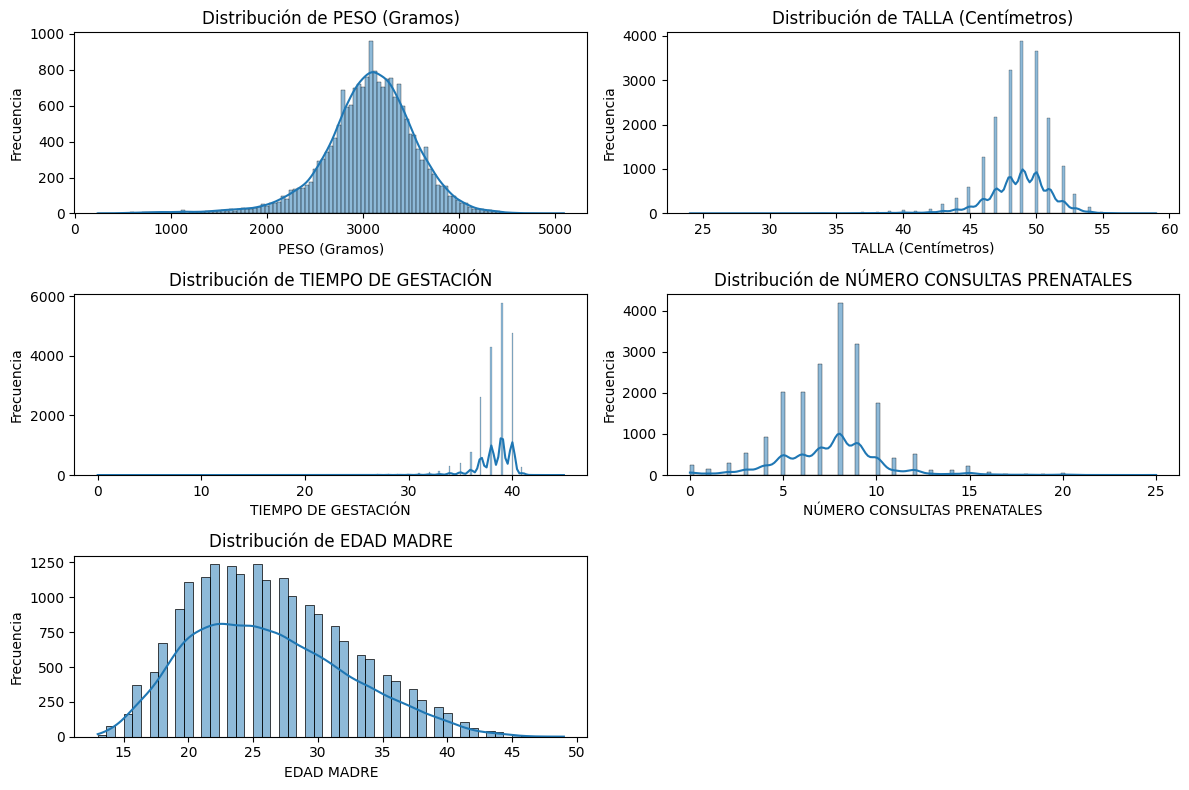

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Mostrar las primeras filas del dataset y obtener información general
print(combinados_data.head())
print(combinados_data.info())

# Analítica descriptiva básica
print(combinados_data.describe())

columnas_numericas = combinados_data.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación entre las variables numéricas
correlation_matrix = columnas_numericas.corr()

# Imprimir la matriz de correlación
print("Matriz de correlación entre las variables numéricas:")
print(correlation_matrix)

# Correlación entre las variables independientes y la variable dependiente (CATEGORIA EDAD en este caso)
#independent_variables = combinados_data.drop('CATEGORIA EDAD', axis=1)  # Excluir la variable dependiente
#dependent_variable = combinados_data['CATEGORIA EDAD']
#correlation_with_dependent = independent_variables.corrwith(dependent_variable)
#print("Correlación con la variable dependiente (CATEGORIA EDAD):")
#print(correlation_with_dependent)

# Visualización de distribuciones y medidas de tendencia central
important_variables = ['PESO (Gramos)', 'TALLA (Centímetros)', 'TIEMPO DE GESTACIÓN', 'NÚMERO CONSULTAS PRENATALES', 'EDAD MADRE']

# Histogramas y distribuciones
plt.figure(figsize=(12, 8))
for i, var in enumerate(important_variables, start=1):
    plt.subplot(3, 2, i)
    sns.histplot(combinados_data[var], kde=True)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()




Estos resultados presentan un análisis detallado de las variables numéricas y su relación en el conjunto de datos de nacimientos. A continuación, una interpretación de los resultados:

Estadísticas descriptivas:
- El peso promedio de los bebés es de 3067 gramos, con una desviación estándar de 482 gramos. El peso varía desde 240 gramos (muy bajo peso) hasta 5090 gramos (peso alto).
- La talla promedio es de 48.6 centímetros, con una desviación estándar de 2.6 centímetros, variando entre 24 y 59 centímetros.
- El tiempo de gestación promedio es de 38.3 semanas, con una desviación estándar de 1.8 semanas, y un rango de 0 a 45 semanas.
- El número promedio de consultas prenatales es de 7.5, con una desviación estándar de 2.8, variando desde 0 hasta 25 consultas.
- La edad promedio de las madres es de 26 años, con una desviación estándar de 6 años, y la edad de los padres es de 29.5 años en promedio, con una desviación estándar de 8 años.

Matriz de correlación:
- Existe una fuerte correlación positiva entre el peso y la talla de los bebés (0.78), lo cual es esperado, ya que bebés más grandes tienden a pesar más.
- Tanto el peso como la talla del bebé tienen una correlación positiva moderada con el tiempo de gestación (0.66 y 0.65, respectivamente), lo que sugiere que a mayor tiempo de gestación, mayor peso y talla.
- Las variables relacionadas con la edad de los padres (EDAD MADRE, EDAD PADRE, CATEGORIA EDAD) tienen una correlación muy baja o casi nula con el peso, la talla y el tiempo de gestación del bebé.
- Las variables categóricas CATEGORIA PESO y CATEGORIA SEMANAS tienen una correlación positiva moderada con el peso y la talla del bebé, así como con el tiempo de gestación, lo cual es consistente con sus definiciones.

En general, estos resultados proporcionan información valiosa sobre las distribuciones, tendencias centrales y relaciones entre las variables clave relacionadas con los nacimientos. Permiten identificar patrones y asociaciones que pueden ser útiles para comprender mejor los factores que influyen en el peso, la talla y el tiempo de gestación de los bebés, así como para desarrollar estrategias y políticas de salud más efectivas.